# Assignment 5: Risk
**Author:** Marcella Morgan

This was really hard! I could not understand why the order of the elements in each row of the arrays were not being sorted in decending order. It was because I was just using [::-1] and so it was reversing the rows. Becasue I had no idea what order the rows had been generated in I had no idea they were being reversed. After hours of hair pulling I resorted to using Chatgpt. It explained what the issue was and gave me this bit of code [...] so that it would sort the elements in the rows and not the rows. I still don't understand how this works exaclty but anyway it seems to be working.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Risk function:

def skirmish(rounds):
    
    # creating attacker's 2D array and sorting each row in descending order
    attacker_rolls = np.sort(np.random.randint(1, 7, (rounds, 3)))[...,::-1]
    
    # creating defender's 2D array and sorting each row in descending order
    defender_rolls = np.sort(np.random.randint(1, 7, (rounds, 2)))[...,::-1]
    
    # making empty lists to fill
    attacker_loses = []
    defender_loses = []
    
    for x in range(rounds):

       

        # Reset losses for this round to 0
            round_attacker_loss = 0
            round_defender_loss = 0

        # Comparing the first dice roll
            if attacker_rolls[x, 0] > defender_rolls[x, 0]:
                round_defender_loss += 1
            
            else:
                round_attacker_loss += 1

        # Comparing the second dice roll
            if attacker_rolls[x, 1] > defender_rolls[x, 1]:
                round_defender_loss += 1
            
            else:
                round_attacker_loss += 1

        # Add losses for this round to list
            attacker_loses.append(round_attacker_loss)
            defender_loses.append(round_defender_loss)
            
    return attacker_loses, defender_loses



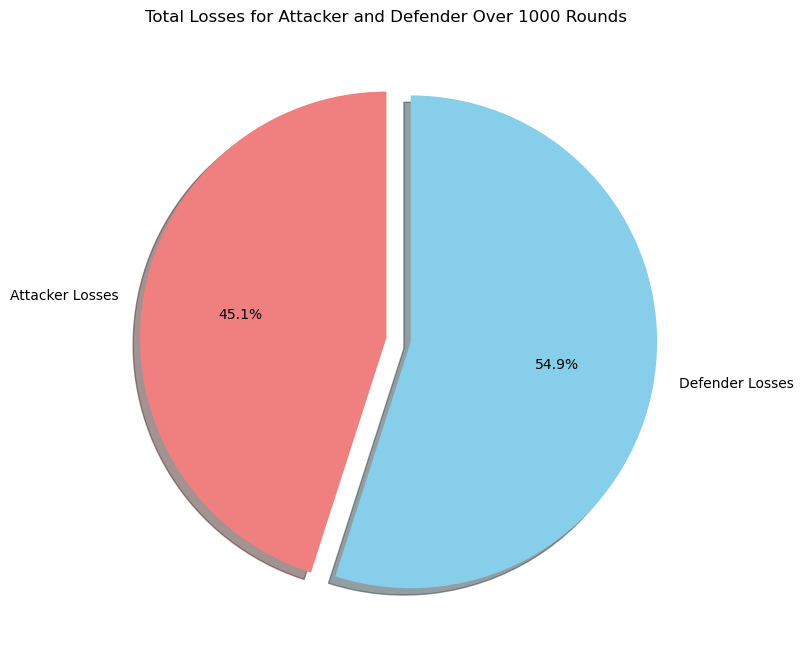

In [60]:


attacker, defender = skirmish(1000)

# Data for the pie chart
total_attacker_losses = sum(attacker)
total_defender_losses = sum(defender)
labels = ['Attacker Losses', 'Defender Losses']
sizes = [total_attacker_losses, total_defender_losses]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=['lightcoral', 'skyblue'],
    explode = [0.1 if size == max(sizes) else 0 for size in sizes], 
    shadow=True,)


plt.title("Total Losses for Attacker and Defender Over 1000 Rounds")
plt.show()

    

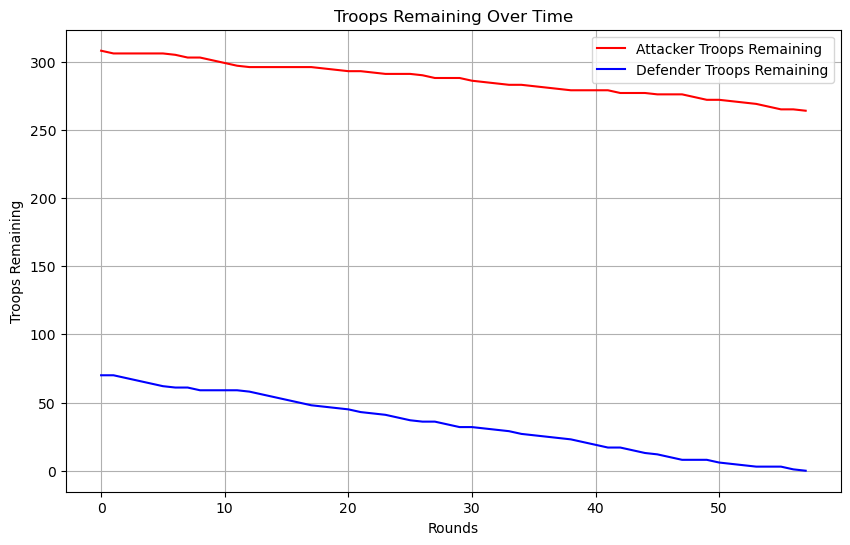

In [ ]:
arbitary_attacker_troops = np.random.randint(10, 500)  # Random attacker troop size
arbitary_defender_troops = np.random.randint(10, 500)  # Random defender troop size

attacker_history, defender_history = [], []

# Simulating a full battle
for _ in range(1000):  
    if  arbitary_attacker_troops > 0 and arbitary_defender_troops > 0:
        attacker_losses, defender_losses = skirmish(1)
        arbitary_attacker_troops -= sum(attacker_losses)
        arbitary_defender_troops -= sum(defender_losses)
        attacker_history.append(arbitary_attacker_troops)
        defender_history.append(arbitary_defender_troops)

plt.figure(figsize=(10, 6))
plt.plot(attacker_history, label="Attacker Troops Remaining", color="red")
plt.plot(defender_history, label="Defender Troops Remaining", color="blue")
plt.xlabel("Rounds")
plt.ylabel("Troops Remaining")
plt.title("Troops Remaining Over Time")
plt.legend()
plt.grid(True)
plt.show()